# from santa_workshop_tour_2019 import io
from santa_workshop_tour_2019.cost import build_cost_function
from santa_workshop_tour_2019.const import cols, days
from santa_workshop_tour_2019.lap import solve as solve_lap
from santa_workshop_tour_2019.optim import greedy, stochastic_product_search

In [344]:
from collections import Counter

In [193]:
from pathlib import Path
data = io.load_data(Path('../../input'))

In [194]:
import numpy as np
occupancies = np.zeros(101, dtype=np.int)
occupancies[1:] = 50
initial_best = solve_lap(data, occupancies)
best = initial_best

In [196]:
choice_dict = data[cols].to_dict()
total_cost = build_cost_function(data)

In [197]:
best, score = greedy(best, choice_dict, total_cost)

In [198]:
def abs_dif_sum(fams, init_fams):
    diff = (fams - init_fams)
    return np.sum(np.abs(diff[:-1] - diff[1:]))

def n_occu(best, prev, r=0.6):
    best_fams = np.array([v for _, v in sorted(Counter(best).items())],dtype=np.int64)
    prev_fams = np.array([v for _, v in sorted(Counter(prev).items())], dtype=np.int64)

    th = r * abs_dif_sum(best_fams, prev_fams)
    while th < abs_dif_sum(best_fams, prev_fams):
        diff = (best_fams - prev_fams)
        i = np.argmax(diff)
        j = np.argmin(diff)
        best_fams[i] -= 1
        best_fams[j] += 1
        print(th, abs_dif_sum(best_fams, prev_fams))
        
    return best_fams

In [337]:
occupancies[1:] = n_occu(best, initial_best, 0.4)

52.0 126
52.0 122
52.0 118
52.0 114
52.0 111
52.0 107
52.0 103
52.0 99
52.0 95
52.0 95
52.0 91
52.0 87
52.0 85
52.0 85
52.0 85
52.0 83
52.0 79
52.0 76
52.0 76
52.0 72
52.0 68
52.0 66
52.0 64
52.0 60
52.0 58
52.0 58
52.0 56
52.0 52


In [338]:
initial_best = solve_lap(data, occupancies)
best = initial_best

In [339]:
total_cost(best)

8400000000.0

In [340]:
best, score = greedy(best, choice_dict, total_cost)
best, score = greedy(best, choice_dict, total_cost)
best, score = greedy(best, choice_dict, total_cost)

In [341]:
score

82104.37042029473

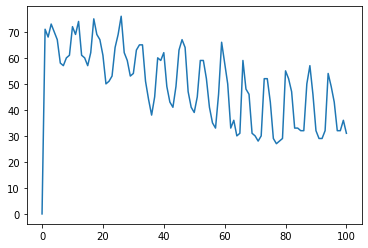

In [342]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.plot(occupancies)

In [30]:
w_fams = best_fams.copy()

def abs_dif_sum(fams, init_fams):
    diff = (fams - init_fams)
    return np.sum(np.abs(diff[:-1] - diff[1:]))

while 500 < abs_dif_sum(w_fams):
    i = np.argmax(w_fams)
    j = np.argmin(w_fams)
    w_fams[i] -= 1
    w_fams[j] += 1
    print(abs_dif_sum(w_fams))


688
685
682
680
677
675
672
668
666
663
661
659
657
654
654
650
648
648
644
642
641
641
641
637
637
635
633
629
628
627
627
623
621
621
617
615
613
612
612
610
608
606
604
601
599
597
593
591
590
590
590
586
586
584
582
578
576
573
571
572
570
570
570
568
566
566
564
562
560
558
554
552
553
551
549
548
546
546
544
542
540
540
536
534
534
532
528
529
527
527
527
523
521
520
518
518
516
514
512
512
510
508
506
504
505
503
503
501
499


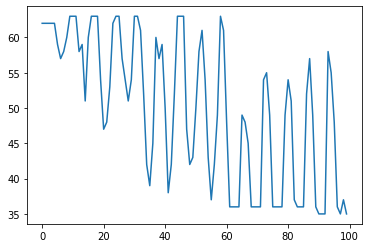

In [31]:
plt.plot(w_fams)

In [ ]:
plt.plot(w_fams)

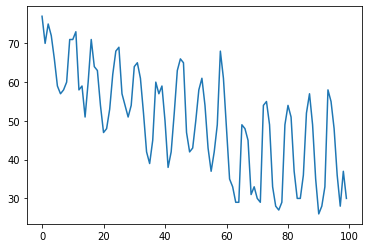

In [32]:
plt.plot(best_fams)

In [40]:
occupancies[1:] = w_fams
w_best = solve_lap(data, occupancies)

In [41]:
total_cost(w_best)

122209.82848268421

In [42]:
w2_best, score = greedy(w_best, choice_dict, total_cost)

In [257]:
bb2 = best.copy()

In [48]:
abs_dif_sum(w2_fams, w_best)

26922

In [49]:
w2_fams = w2_best.copy()


def abs_dif_sum(fams, init_fams):
    diff = (fams - init_fams)
    return np.sum(np.abs(diff[:-1] - diff[1:]))

while 20922 < abs_dif_sum(w2_fams, w_best):
    i = np.argmax(w2_fams)
    j = np.argmin(w2_fams)
    w2_fams[i] -= 1
    w2_fams[j] += 1
    print(abs_dif_sum(w2_fams, w2_best))

4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80
84
88
92
96
100
104
108
112
116
120
124
128
132
136
140
144
148
152
156
160
164
168
172
176
180
184
188
192
196
200
204
208
212
216
220
224
228
232
234
238
242
246
250
254
258
262
266
270
274
278
282
286
290
294
298
302
306
310
314
318
320
324
328
330
334
338
342
346
350
354
358
362
366
370
374
378
382
386
390
394
398
402
406
410
414
418
422
426
430
434
438
442
446
450
454
458
462
466
470
474
478
482
486
490
494
498
502
506
510
514
518
522
526
530
534
538
542
546
548
552
556
560
564
568
572
576
578
582
586
590
594
598
602
606
610
614
618
622
626
630
634
636
638
642
646
650
654
658
662
666
670
672
676
680
682
686
690
694
698
702
706
710
714
718
722
726
730
734
738
742
746
750
754
756
760
764
768
772
776
780
784
788
792
796
800
804
808
812
814
818
822
826
830
834
838
842
846
848
852
856
860
862
866
870
874
878
882
886
890
894
898
902
906
910
914
918
922
926
930
934
938
942
946
950
954
958
962
966
968
972
976
980
984
988
992
996
10

7032
7036
7040
7044
7048
7052
7056
7060
7060
7064
7068
7072
7076
7080
7084
7088
7090
7094
7098
7102
7106
7110
7114
7116
7120
7122
7126
7130
7134
7138
7142
7146
7150
7154
7158
7162
7164
7168
7172
7176
7180
7184
7188
7192
7196
7198
7202
7206
7210
7214
7214
7218
7222
7226
7228
7232
7236
7240
7242
7244
7248
7252
7256
7260
7260
7264
7266
7270
7274
7278
7282
7286
7288
7292
7296
7300
7304
7308
7312
7314
7318
7322
7326
7330
7334
7338
7342
7346
7350
7354
7358
7362
7366
7370
7374
7378
7382
7386
7390
7394
7398
7402
7404
7408
7412
7416
7420
7424
7428
7432
7436
7440
7444
7448
7452
7456
7458
7462
7464
7468
7472
7476
7480
7484
7486
7488
7492
7496
7500
7504
7506
7510
7514
7518
7522
7526
7530
7532
7536
7538
7542
7546
7550
7554
7558
7562
7564
7568
7572
7576
7578
7582
7586
7590
7594
7598
7602
7606
7608
7610
7614
7618
7622
7626
7630
7634
7638
7642
7646
7650
7654
7658
7662
7666
7670
7674
7676
7680
7684
7688
7692
7696
7700
7704
7708
7712
7716
7720
7724
7728
7732
7736
7740
7744
7748
7750
7754
7758
7762
7766


12614
12618
12620
12622
12626
12628
12632
12636
12640
12644
12646
12650
12650
12654
12658
12662
12666
12670
12674
12678
12682
12686
12690
12694
12696
12696
12700
12704
12708
12712
12716
12720
12724
12728
12732
12734
12738
12742
12746
12750
12754
12758
12762
12766
12770
12774
12776
12780
12784
12788
12792
12792
12796
12800
12804
12808
12812
12814
12818
12822
12826
12830
12834
12836
12840
12844
12844
12846
12850
12854
12858
12862
12866
12868
12872
12874
12878
12882
12884
12888
12892
12894
12896
12900
12904
12908
12912
12916
12920
12924
12928
12932
12936
12938
12940
12944
12948
12952
12956
12958
12962
12966
12970
12974
12978
12982
12986
12990
12994
12998
13002
13006
13010
13014
13016
13020
13024
13028
13032
13036
13040
13044
13048
13052
13056
13060
13064
13068
13072
13076
13080
13084
13088
13092
13096
13098
13102
13106
13110
13112
13116
13120
13124
13128
13132
13134
13134
13138
13140
13144
13148
13150
13154
13158
13162
13164
13168
13172
13176
13180
13184
13188
13192
13196
13200
13202
1320

18238
18240
18244
18248
18250
18254
18258
18262
18266
18270
18272
18276
18280
18284
18286
18290
18294
18298
18302
18306
18310
18314
18318
18318
18322
18324
18328
18332
18336
18340
18342
18346
18350
18354
18356
18360
18362
18366
18370
18374
18378
18382
18386
18386
18388
18392
18394
18398
18398
18400
18404
18406
18410
18414
18418
18422
18426
18430
18434
18438
18440
18442
18446
18450
18452
18454
18458
18462
18466
18470
18472
18476
18480
18484
18488
18492
18496
18500
18504
18508
18510
18514
18516
18518
18520
18524
18528
18532
18534
18538
18542
18546
18550
18554
18556
18560
18564
18566
18570
18574
18576
18578
18580
18584
18586
18588
18590
18594
18596
18600
18604
18608
18612
18616
18620
18624
18626
18628
18632
18636
18640
18644
18646
18650
18654
18656
18660
18664
18668
18672
18676
18680
18684
18688
18692
18696
18700
18704
18708
18712
18716
18716
18720
18724
18726
18730
18734
18738
18742
18746
18748
18750
18754
18756
18760
18764
18768
18772
18774
18778
18782
18782
18784
18788
18792
18796
1879

23481
23485
23489
23493
23495
23499
23503
23505
23509
23509
23513
23515
23519
23523
23521
23525
23529
23533
23537
23541
23545
23549
23551
23555
23559
23563
23567
23571
23575
23579
23581
23583
23581
23585
23589
23591
23589
23593
23597
23599
23603
23605
23609
23611
23615
23617
23621
23625
23629
23633
23637
23641
23645
23647
23651
23653
23657
23661
23665
23669
23673
23677
23681
23685
23687
23689
23693
23697
23699
23703
23703
23707
23711
23715
23719
23723
23725
23729
23733
23737
23741
23745
23747
23751
23755
23759
23763
23767
23771
23773
23777
23781
23785
23787
23791
23793
23797
23801
23803
23805
23809
23813
23813
23817
23821
23825
23829
23833
23835
23839
23841
23845
23849
23853
23857
23861
23861
23865
23869
23873
23877
23881
23885
23887
23891
23895
23899
23899
23903
23907
23911
23913
23917
23921
23925
23929
23933
23937
23941
23945
23947
23951
23953
23957
23961
23963
23967
23971
23973
23977
23981
23985
23987
23991
23995
23997
24001
24005
24009
24013
24017
24021
24025
24029
24033
24035
2403

28721
28723
28723
28727
28727
28731
28735
28739
28743
28745
28747
28751
28753
28757
28761
28765
28769
28771
28775
28779
28783
28785
28787
28791
28793
28797
28801
28805
28807
28809
28813
28817
28819
28823
28823
28827
28831
28835
28839
28843
28847
28851
28853
28853
28857
28861
28865
28869
28871
28875
28879
28879
28883
28887
28891
28895
28899
28903
28907
28911
28915
28919
28921
28925
28927
28931
28935
28937
28941
28943
28947
28951
28951
28955
28959
28961
28965
28969
28973
28977
28981
28985
28989
28993
28997
29001
29005
29009
29011
29015
29019
29021
29025
29029
29033
29037
29041
29045
29049
29051
29055
29057
29061
29065
29069
29073
29077
29079
29083
29087
29091
29095
29099
29103
29105
29107
29109
29111
29115
29117
29119
29123
29127
29129
29133
29137
29141
29145
29147
29151
29155
29159
29161
29165
29167
29171
29175
29179
29181
29185
29189
29193
29197
29201
29201
29205
29209
29211
29215
29219
29223
29227
29231
29235
29239
29243
29247
29249
29253
29257
29259
29263
29267
29269
29271
29273
2927

33800
33802
33806
33810
33812
33816
33820
33824
33826
33828
33832
33836
33840
33842
33846
33848
33850
33854
33858
33862
33866
33870
33868
33872
33872
33876
33880
33884
33888
33888
33892
33892
33896
33900
33904
33908
33912
33916
33918
33922
33926
33930
33930
33934
33936
33940
33944
33944
33948
33952
33956
33960
33964
33968
33972
33976
33980
33982
33986
33990
33994
33996
34000
34004
34008
34010
34014
34018
34020
34024
34028
34032
34036
34038
34040
34044
34046
34050
34054
34058
34062
34064
34068
34072
34076
34080
34082
34086
34090
34092
34094
34098
34102
34106
34108
34112
34116
34118
34120
34124
34128
34132
34134
34138
34138
34142
34146
34150
34152
34156
34156
34160
34164
34168
34168
34172
34172
34176
34180
34182
34186
34190
34194
34198
34202
34206
34210
34214
34218
34222
34224
34228
34232
34234
34238
34242
34246
34248
34248
34252
34254
34258
34260
34262
34264
34266
34268
34272
34274
34278
34282
34284
34286
34288
34290
34294
34298
34300
34300
34304
34308
34312
34316
34318
34322
34324
3432

38762
38764
38768
38770
38772
38776
38780
38784
38784
38786
38790
38794
38798
38800
38804
38808
38812
38816
38820
38824
38826
38828
38832
38836
38840
38844
38848
38852
38856
38860
38864
38868
38870
38874
38876
38880
38880
38884
38886
38890
38894
38896
38900
38902
38904
38906
38910
38914
38918
38918
38922
38926
38928
38932
38932
38936
38940
38944
38948
38952
38956
38960
38964
38968
38966
38970
38974
38976
38980
38982
38984
38988
38992
38996
38996
39000
39002
39006
39010
39014
39018
39022
39026
39030
39030
39034
39036
39040
39042
39046
39050
39054
39056
39060
39064
39066
39070
39074
39078
39080
39084
39088
39092
39096
39100
39104
39106
39110
39114
39118
39118
39122
39126
39130
39134
39136
39140
39144
39148
39152
39156
39160
39164
39168
39172
39170
39174
39178
39182
39186
39190
39192
39194
39198
39202
39206
39210
39214
39218
39222
39226
39230
39234
39238
39242
39246
39248
39252
39256
39258
39260
39262
39264
39266
39270
39272
39272
39276
39280
39282
39286
39288
39290
39292
39294
39296
3929

43647
43651
43655
43659
43661
43665
43665
43669
43671
43675
43677
43681
43681
43685
43689
43693
43697
43697
43701
43705
43707
43709
43713
43715
43717
43719
43721
43723
43727
43731
43733
43737
43741
43743
43747
43751
43755
43759
43763
43765
43769
43773
43777
43779
43783
43787
43791
43795
43799
43803
43807
43809
43811
43815
43817
43819
43823
43827
43831
43835
43839
43843
43847
43851
43853
43857
43861
43865
43869
43873
43873
43875
43879
43883
43885
43889
43893
43895
43899
43903
43905
43909
43911
43913
43917
43921
43925
43925
43929
43933
43935
43939
43943
43947
43949
43953
43957
43961
43961
43963
43965
43969
43973
43977
43981
43983
43987
43991
43993
43995
43995
43999
44003
44005
44009
44013
44017
44021
44023
44027
44031
44035
44037
44041
44045
44049
44053
44057
44061
44063
44067
44071
44073
44075
44079
44083
44087
44091
44095
44099
44103
44105
44109
44113
44115
44119
44121
44123
44125
44129
44131
44135
44139
44143
44147
44149
44151
44155
44159
44163
44167
44171
44173
44177
44181
44185
4418

48468
48470
48474
48476
48480
48482
48486
48490
48492
48496
48500
48502
48506
48508
48512
48514
48518
48522
48526
48530
48534
48538
48540
48544
48546
48550
48554
48558
48560
48562
48566
48570
48574
48574
48578
48582
48586
48590
48592
48596
48600
48602
48606
48610
48614
48618
48622
48624
48628
48628
48632
48636
48638
48642
48644
48648
48648
48652
48654
48658
48660
48664
48668
48672
48676
48678
48682
48686
48690
48694
48698
48702
48706
48710
48712
48716
48718
48720
48722
48726
48730
48734
48736
48736
48740
48742
48742
48746
48746
48750
48752
48756
48758
48758
48762
48766
48770
48770
48774
48778
48782
48786
48790
48794
48796
48800
48802
48806
48810
48812
48816
48820
48822
48826
48830
48832
48834
48836
48836
48840
48842
48846
48850
48854
48858
48862
48866
48866
48868
48872
48876
48878
48880
48882
48886
48886
48888
48888
48890
48894
48898
48902
48906
48908
48908
48912
48914
48918
48920
48924
48924
48928
48932
48934
48938
48938
48942
48946
48948
48950
48954
48958
48958
48962
48964
48964
4896

53155
53159
53163
53165
53169
53173
53177
53181
53183
53187
53191
53195
53199
53201
53205
53209
53211
53215
53219
53221
53225
53227
53231
53229
53233
53237
53241
53243
53243
53247
53251
53251
53255
53259
53263
53263
53267
53269
53273
53277
53279
53281
53283
53283
53285
53287
53291
53293
53295
53299
53301
53303
53305
53309
53313
53315
53319
53323
53323
53327
53329
53331
53335
53337
53339
53343
53345
53347
53351
53353
53355
53355
53357
53359
53363
53367
53371
53375
53377
53381
53385
53387
53389
53393
53397
53401
53405
53409
53413
53417
53421
53423
53427
53427
53431
53435
53439
53439
53441
53445
53449
53451
53455
53459
53461
53465
53467
53469
53473
53477
53479
53483
53487
53491
53495
53499
53503
53507
53511
53515
53517
53521
53525
53529
53531
53535
53539
53543
53547
53547
53551
53555
53559
53563
53565
53567
53571
53575
53579
53583
53585
53587
53591
53595
53599
53603
53605
53609
53609
53613
53617
53621
53623
53627
53627
53629
53633
53637
53641
53645
53649
53653
53655
53655
53659
53659
5366

57828
57832
57834
57838
57840
57842
57846
57850
57852
57856
57858
57858
57862
57864
57868
57866
57870
57874
57878
57880
57880
57884
57888
57892
57896
57900
57904
57906
57910
57914
57918
57922
57924
57926
57928
57932
57934
57938
57942
57946
57948
57952
57956
57960
57964
57968
57972
57974
57976
57980
57984
57988
57992
57994
57998
58002
58004
58006
58006
58010
58012
58012
58016
58018
58020
58024
58028
58032
58036
58036
58038
58040
58042
58046
58046
58050
58052
58054
58058
58060
58062
58066
58070
58072
58076
58076
58080
58082
58082
58086
58088
58090
58094
58098
58102
58104
58108
58112
58116
58118
58122
58124
58128
58132
58134
58136
58136
58140
58140
58144
58148
58150
58154
58158
58162
58164
58168
58170
58172
58174
58176
58178
58178
58180
58184
58188
58192
58192
58196
58200
58202
58206
58208
58212
58216
58218
58222
58226
58230
58234
58236
58240
58244
58248
58252
58254
58258
58262
58266
58270
58274
58276
58278
58282
58284
58288
58290
58294
58298
58302
58306
58310
58314
58318
58320
58322
5832

62427
62431
62435
62439
62441
62443
62447
62449
62453
62455
62459
62461
62463
62467
62469
62471
62473
62477
62481
62485
62487
62491
62495
62497
62501
62503
62507
62509
62513
62517
62519
62521
62521
62525
62525
62529
62527
62531
62535
62537
62539
62541
62541
62545
62547
62551
62555
62559
62563
62567
62569
62573
62575
62579
62583
62587
62591
62591
62595
62595
62599
62601
62603
62605
62609
62613
62615
62619
62619
62623
62627
62627
62631
62633
62637
62637
62639
62643
62645
62647
62651
62653
62657
62659
62661
62665
62669
62673
62677
62681
62685
62689
62693
62695
62699
62703
62707
62711
62715
62719
62723
62725
62729
62733
62737
62739
62741
62741
62745
62747
62751
62751
62755
62759
62763
62767
62771
62773
62775
62779
62783
62787
62789
62791
62795
62799
62801
62805
62807
62811
62815
62817
62821
62823
62827
62829
62831
62835
62839
62841
62845
62849
62853
62857
62859
62863
62867
62869
62873
62877
62879
62881
62885
62889
62893
62895
62897
62897
62899
62901
62905
62909
62909
62911
62913
62917
6292

66976
66980
66980
66984
66988
66992
66996
66996
67000
67004
67008
67012
67016
67018
67022
67024
67028
67030
67034
67036
67040
67040
67044
67048
67050
67054
67054
67056
67058
67060
67064
67066
67068
67072
67076
67080
67084
67086
67090
67094
67096
67100
67100
67104
67106
67108
67110
67114
67112
67116
67120
67122
67126
67126
67130
67134
67136
67140
67140
67142
67146
67150
67154
67158
67162
67164
67168
67168
67172
67174
67178
67180
67180
67184
67184
67184
67188
67188
67192
67194
67196
67200
67204
67208
67210
67210
67214
67218
67222
67224
67228
67232
67236
67240
67244
67242
67246
67250
67254
67258
67262
67264
67266
67270
67274
67276
67280
67284
67288
67292
67294
67298
67302
67304
67308
67312
67316
67320
67322
67324
67326
67330
67332
67336
67340
67342
67342
67346
67348
67352
67354
67356
67356
67360
67362
67364
67368
67370
67374
67378
67380
67384
67388
67390
67394
67398
67398
67402
67404
67408
67412
67416
67420
67422
67426
67428
67432
67434
67436
67440
67442
67444
67448
67452
67456
67458
6746

71465
71469
71473
71477
71481
71485
71489
71493
71497
71499
71501
71503
71507
71507
71511
71515
71519
71523
71525
71529
71533
71535
71537
71537
71541
71545
71547
71547
71551
71555
71557
71561
71565
71569
71571
71575
71579
71581
71585
71589
71591
71595
71599
71601
71605
71607
71607
71611
71615
71619
71621
71625
71629
71633
71635
71639
71639
71641
71645
71649
71653
71655
71659
71663
71667
71671
71675
71673
71677
71679
71683
71685
71689
71691
71693
71695
71699
71699
71703
71707
71711
71713
71717
71719
71723
71725
71729
71731
71733
71735
71739
71741
71743
71747
71751
71753
71757
71759
71763
71767
71769
71773
71775
71779
71779
71783
71787
71791
71791
71795
71799
71801
71805
71807
71809
71813
71815
71819
71821
71825
71827
71831
71833
71835
71837
71841
71845
71849
71853
71855
71859
71863
71865
71867
71871
71871
71875
71877
71881
71885
71887
71887
71891
71895
71895
71897
71901
71899
71903
71907
71909
71913
71915
71915
71917
71921
71925
71929
71933
71935
71939
71941
71943
71945
71949
71951
7195

75906
75910
75912
75914
75914
75918
75918
75920
75924
75928
75930
75932
75936
75936
75940
75944
75948
75952
75954
75954
75958
75962
75966
75968
75972
75974
75976
75978
75982
75980
75982
75984
75986
75990
75992
75996
75998
76000
76000
76002
76004
76006
76008
76010
76014
76014
76018
76020
76022
76026
76028
76032
76036
76040
76040
76042
76044
76048
76048
76050
76052
76056
76058
76060
76064
76068
76072
76070
76074
76078
76080
76084
76086
76090
76092
76096
76096
76100
76104
76106
76106
76108
76112
76114
76118
76122
76126
76128
76132
76136
76138
76142
76146
76150
76154
76158
76158
76162
76166
76170
76166
76170
76172
76174
76178
76180
76184
76188
76188
76192
76194
76198
76200
76204
76206
76210
76212
76216
76218
76220
76224
76226
76230
76232
76232
76236
76236
76240
76242
76246
76250
76254
76256
76260
76264
76266
76268
76270
76274
76276
76280
76282
76284
76288
76288
76292
76294
76296
76300
76302
76304
76308
76306
76308
76312
76316
76320
76324
76328
76332
76334
76338
76342
76346
76348
76352
7635

80273
80271
80275
80279
80281
80285
80289
80293
80293
80295
80297
80301
80305
80309
80307
80309
80313
80313
80313
80315
80317
80321
80323
80325
80327
80329
80331
80335
80335
80337
80337
80341
80345
80349
80351
80355
80359
80363
80365
80369
80373
80377
80381
80383
80387
80389
80389
80393
80397
80397
80401
80403
80405
80409
80409
80413
80413
80415
80417
80419
80423
80427
80427
80431
80435
80439
80443
80447
80449
80453
80457
80461
80465
80469
80473
80477
80477
80481
80481
80483
80487
80489
80491
80493
80497
80497
80501
80505
80509
80513
80515
80517
80521
80525
80527
80527
80529
80533
80535
80537
80539
80543
80545
80549
80551
80555
80559
80559
80563
80567
80571
80575
80577
80581
80581
80583
80585
80587
80591
80593
80597
80601
80603
80607
80609
80609
80611
80615
80619
80623
80625
80629
80633
80635
80637
80639
80641
80641
80645
80647
80651
80655
80655
80659
80663
80667
80671
80673
80677
80679
80681
80685
80685
80687
80689
80687
80689
80689
80691
80693
80695
80699
80703
80703
80707
80711
8071

84612
84612
84616
84618
84620
84622
84624
84626
84630
84634
84636
84640
84644
84648
84650
84650
84654
84656
84660
84662
84664
84666
84668
84672
84674
84678
84682
84684
84684
84686
84690
84694
84696
84698
84702
84706
84710
84712
84716
84720
84724
84728
84730
84732
84736
84738
84740
84742
84746
84748
84752
84754
84756
84760
84762
84764
84766
84770
84774
84776
84780
84780
84784
84786
84790
84794
84798
84800
84800
84802
84806
84810
84814
84818
84820
84824
84828
84832
84832
84834
84836
84836
84840
84842
84844
84846
84846
84850
84848
84852
84852
84856
84860
84864
84868
84870
84872
84876
84880
84884
84886
84890
84892
84894
84898
84900
84900
84904
84904
84908
84912
84914
84918
84920
84920
84924
84926
84930
84934
84934
84938
84942
84944
84948
84952
84954
84956
84958
84960
84964
84968
84970
84974
84976
84978
84982
84984
84988
84992
84996
84998
85002
85004
85008
85012
85014
85016
85018
85020
85024
85028
85030
85034
85036
85040
85042
85044
85048
85052
85054
85058
85062
85066
85068
85070
85074
8507

88853
88855
88853
88855
88857
88861
88863
88867
88871
88875
88877
88881
88883
88887
88887
88889
88891
88893
88897
88901
88901
88905
88905
88909
88913
88915
88919
88921
88925
88927
88929
88931
88935
88933
88935
88939
88939
88943
88947
88947
88951
88951
88955
88957
88957
88961
88965
88969
88973
88977
88981
88985
88989
88993
88997
88997
89001
89003
89007
89011
89015
89019
89019
89021
89025
89029
89033
89037
89039
89041
89043
89047
89051
89055
89057
89061
89063
89067
89067
89071
89071
89075
89079
89081
89083
89087
89091
89093
89095
89097
89101
89105
89109
89111
89115
89119
89123
89127
89129
89131
89135
89139
89141
89143
89147
89149
89153
89155
89159
89161
89163
89167
89167
89171
89173
89175
89177
89179
89181
89185
89185
89189
89193
89193
89197
89201
89201
89201
89205
89209
89213
89217
89219
89223
89227
89227
89231
89235
89239
89243
89245
89247
89249
89251
89255
89255
89259
89263
89267
89267
89271
89275
89277
89277
89281
89285
89289
89293
89297
89297
89299
89299
89301
89303
89307
89309
8931

93001
93005
93009
93013
93017
93021
93023
93027
93029
93033
93035
93037
93039
93043
93047
93049
93051
93051
93055
93059
93061
93065
93069
93069
93073
93075
93079
93081
93083
93087
93091
93095
93095
93099
93101
93105
93109
93113
93115
93115
93119
93121
93125
93127
93131
93135
93139
93139
93141
93145
93149
93153
93157
93159
93163
93167
93169
93171
93173
93177
93179
93181
93183
93183
93185
93189
93193
93197
93201
93201
93205
93205
93207
93209
93213
93211
93215
93219
93219
93223
93227
93225
93229
93231
93233
93237
93241
93243
93245
93247
93247
93249
93251
93255
93257
93261
93263
93263
93265
93267
93265
93269
93273
93277
93279
93283
93287
93289
93290
93294
93298
93300
93304
93308
93312
93314
93316
93320
93322
93324
93328
93330
93332
93332
93334
93336
93340
93344
93346
93350
93354
93356
93360
93364
93364
93368
93372
93376
93378
93382
93382
93386
93390
93392
93394
93396
93400
93404
93406
93410
93414
93418
93422
93426
93430
93432
93434
93436
93440
93440
93444
93446
93450
93452
93454
93456
9346

97116
97120
97122
97126
97128
97132
97136
97138
97142
97146
97146
97148
97150
97154
97158
97160
97164
97166
97168
97172
97176
97178
97182
97186
97190
97192
97196
97198
97202
97202
97206
97208
97210
97210
97214
97216
97220
97222
97226
97228
97230
97234
97236
97240
97244
97246
97250
97254
97258
97260
97264
97264
97268
97272
97276
97280
97284
97284
97286
97290
97292
97296
97296
97300
97304
97308
97310
97310
97312
97312
97316
97320
97324
97324
97328
97328
97332
97330
97334
97332
97336
97340
97342
97346
97350
97350
97354
97358
97360
97364
97366
97368
97372
97374
97374
97378
97380
97382
97386
97390
97394
97394
97396
97398
97400
97402
97404
97408
97408
97412
97416
97418
97418
97422
97424
97428
97432
97434
97434
97436
97438
97442
97444
97448
97452
97454
97458
97454
97456
97458
97460
97464
97468
97470
97474
97478
97478
97482
97486
97488
97490
97494
97496
97498
97502
97506
97506
97510
97514
97516
97518
97520
97520
97524
97526
97530
97532
97536
97538
97540
97544
97546
97546
97550
97552
97556
9755

101147
101149
101151
101153
101153
101157
101159
101161
101165
101167
101169
101169
101173
101173
101175
101177
101179
101181
101181
101185
101189
101193
101193
101197
101199
101203
101205
101209
101209
101209
101211
101213
101217
101213
101217
101215
101219
101221
101223
101227
101231
101235
101235
101237
101241
101245
101243
101247
101249
101251
101255
101259
101259
101263
101265
101267
101271
101271
101275
101273
101277
101281
101285
101289
101293
101297
101301
101305
101309
101311
101313
101317
101319
101323
101325
101329
101333
101333
101333
101337
101339
101343
101347
101351
101355
101357
101357
101361
101365
101363
101367
101367
101371
101375
101375
101377
101381
101381
101385
101387
101391
101395
101397
101399
101401
101403
101405
101409
101413
101415
101419
101419
101419
101423
101425
101429
101431
101433
101437
101439
101443
101445
101447
101451
101455
101457
101459
101463
101465
101467
101471
101473
101475
101477
101479
101477
101481
101483
101485
101485
101487
101491
101493

104730
104734
104736
104740
104744
104746
104750
104752
104756
104752
104756
104760
104762
104764
104768
104768
104772
104774
104778
104778
104780
104784
104788
104786
104790
104788
104790
104794
104796
104796
104800
104804
104808
104808
104812
104814
104812
104814
104816
104814
104818
104820
104820
104822
104824
104828
104832
104836
104838
104840
104844
104848
104852
104854
104858
104860
104860
104860
104864
104868
104872
104876
104880
104882
104884
104888
104892
104890
104894
104896
104898
104902
104906
104908
104912
104916
104916
104918
104920
104922
104922
104926
104930
104932
104936
104938
104942
104946
104950
104954
104956
104960
104964
104968
104972
104974
104976
104980
104984
104988
104986
104990
104992
104992
104996
104998
105000
105002
105004
105004
105008
105012
105012
105016
105020
105024
105024
105026
105028
105030
105034
105036
105038
105038
105040
105044
105046
105048
105052
105052
105054
105058
105062
105060
105062
105066
105068
105072
105074
105078
105082
105086
105090

107852
107854
107854
107858
107862
107864
107866
107870
107870
107872
107876
107880
107880
107884
107888
107890
107894
107898
107896
107900
107904
107908
107910
107914
107914
107916
107918
107920
107922
107926
107928
107932
107932
107936
107940
107942
107944
107946
107950
107952
107952
107956
107956
107960
107962
107966
107970
107972
107976
107978
107980
107982
107986
107986
107988
107990
107994
107994
107996
107998
108000
108004
108006
108006
108008
108012
108016
108020
108020
108024
108026
108028
108030
108034
108036
108040
108042
108046
108050
108054
108058
108060
108064
108066
108068
108072
108076
108076
108080
108080
108084
108088
108092
108096
108096
108098
108102
108106
108108
108110
108110
108114
108114
108116
108120
108122
108122
108124
108128
108132
108134
108138
108142
108140
108142
108144
108146
108150
108154
108152
108156
108158
108162
108164
108166
108168
108172
108174
108178
108176
108180
108184
108186
108190
108190
108194
108196
108200
108202
108202
108204
108206
108208

110969
110973
110975
110975
110979
110979
110981
110981
110981
110983
110987
110987
110989
110993
110997
111001
111003
111005
111009
111013
111017
111019
111023
111025
111029
111029
111031
111035
111039
111041
111043
111045
111049
111051
111051
111055
111057
111059
111063
111067
111071
111071
111073
111075
111077
111079
111079
111079
111081
111083
111087
111091
111091
111095
111099
111101
111103
111107
111111
111115
111119
111119
111121
111123
111127
111127
111131
111135
111139
111141
111145
111147
111151
111155
111159
111163
111161
111165
111169
111171
111175
111177
111181
111185
111189
111191
111191
111195
111199
111203
111203
111207
111209
111213
111217
111219
111219
111221
111221
111225
111229
111233
111233
111233
111237
111237
111241
111243
111245
111245
111247
111249
111253
111255
111259
111263
111265
111267
111271
111275
111271
111275
111279
111283
111287
111291
111295
111297
111299
111301
111303
111305
111307
111309
111311
111313
111317
111319
111323
111325
111325
111327
111329

114073
114077
114079
114083
114087
114091
114093
114097
114098
114100
114104
114108
114110
114110
114114
114112
114116
114120
114122
114126
114130
114132
114136
114138
114140
114142
114140
114144
114146
114148
114152
114154
114156
114158
114160
114162
114164
114166
114170
114170
114174
114178
114182
114184
114188
114192
114194
114198
114200
114204
114204
114208
114210
114214
114218
114220
114224
114228
114232
114230
114232
114232
114236
114240
114244
114246
114250
114252
114254
114258
114260
114264
114264
114268
114266
114270
114274
114276
114278
114282
114286
114288
114292
114292
114294
114298
114300
114304
114308
114310
114310
114314
114314
114318
114322
114326
114326
114330
114330
114332
114336
114340
114344
114348
114348
114352
114354
114356
114360
114364
114366
114368
114370
114374
114376
114380
114382
114386
114384
114388
114390
114394
114396
114396
114400
114400
114404
114406
114408
114408
114408
114412
114414
114418
114420
114420
114422
114424
114426
114430
114432
114434
114438

117326
117328
117328
117332
117330
117334
117336
117340
117344
117348
117348
117352
117356
117358
117358
117362
117366
117366
117368
117370
117370
117374
117376
117380
117382
117384
117388
117390
117392
117394
117394
117394
117396
117400
117400
117404
117404
117406
117410
117414
117416
117420
117424
117424
117426
117430
117432
117434
117438
117440
117440
117442
117446
117448
117450
117450
117454
117456
117460
117460
117464
117466
117470
117474
117478
117482
117484
117484
117486
117488
117492
117494
117498
117500
117502
117506
117508
117512
117512
117516
117518
117522
117526
117528
117530
117534
117536
117538
117538
117538
117542
117544
117548
117552
117554
117558
117560
117564
117568
117570
117572
117576
117580
117584
117584
117588
117592
117596
117596
117600
117602
117604
117608
117610
117612
117616
117620
117622
117624
117628
117630
117632
117632
117634
117636
117640
117644
117646
117646
117650
117654
117654
117658
117662
117664
117666
117670
117672
117672
117674
117674
117678
117680

120355
120357
120361
120359
120363
120363
120367
120369
120373
120375
120379
120377
120381
120377
120381
120381
120385
120385
120387
120389
120393
120395
120399
120401
120401
120405
120409
120409
120413
120413
120417
120421
120425
120429
120431
120433
120433
120435
120437
120441
120441
120445
120449
120449
120453
120453
120457
120459
120461
120461
120465
120467
120471
120473
120475
120479
120483
120485
120489
120493
120493
120497
120499
120503
120505
120509
120513
120517
120519
120519
120523
120523
120527
120529
120533
120535
120539
120543
120545
120549
120551
120555
120559
120561
120563
120565
120567
120571
120573
120575
120579
120583
120587
120591
120593
120597
120601
120599
120603
120607
120609
120611
120615
120613
120617
120621
120625
120625
120627
120627
120631
120631
120635
120635
120635
120637
120641
120641
120645
120647
120649
120651
120653
120655
120659
120659
120661
120661
120661
120663
120665
120667
120669
120671
120675
120677
120681
120685
120685
120687
120691
120693
120695

123321
123325
123327
123327
123327
123331
123335
123337
123341
123343
123345
123343
123347
123349
123353
123357
123357
123359
123361
123365
123369
123371
123373
123377
123373
123375
123375
123377
123381
123385
123389
123391
123393
123397
123397
123401
123405
123409
123411
123415
123417
123421
123423
123425
123429
123431
123431
123435
123437
123439
123441
123443
123445
123449
123451
123453
123453
123457
123461
123461
123465
123469
123471
123471
123473
123475
123479
123481
123485
123485
123489
123489
123493
123495
123497
123499
123503
123505
123509
123513
123513
123517
123521
123521
123525
123521
123525
123527
123529
123533
123535
123537
123539
123541
123545
123547
123549
123551
123555
123555
123559
123559
123563
123565
123569
123567
123571
123573
123577
123581
123583
123587
123587
123591
123593
123597
123599
123603
123603
123607
123609
123611
123615
123615
123619
123619
123623
123625
123629
123633
123633
123637
123637
123639
123641
123641
123643
123647
123651
123653
123657
123657
123661

126292
126294
126296
126298
126300
126304
126308
126310
126314
126318
126320
126322
126326
126330
126334
126336
126340
126340
126344
126346
126350
126350
126352
126356
126356
126360
126360
126362
126364
126364
126366
126370
126370
126374
126376
126378
126382
126386
126388
126388
126392
126392
126396
126400
126402
126406
126408
126408
126408
126410
126414
126414
126418
126420
126424
126426
126428
126432
126432
126434
126438
126442
126444
126448
126450
126450
126454
126454
126458
126458
126460
126464
126464
126468
126470
126474
126478
126480
126484
126484
126488
126492
126496
126494
126498
126500
126502
126502
126504
126508
126508
126512
126514
126516
126520
126524
126524
126528
126528
126530
126534
126536
126540
126540
126542
126544
126544
126548
126546
126550
126552
126556
126560
126562
126566
126570
126574
126576
126580
126582
126586
126590
126592
126592
126596
126598
126602
126606
126608
126610
126610
126612
126614
126614
126618
126620
126622
126626
126630
126628
126632
126636
126640

129190
129192
129196
129198
129200
129204
129206
129210
129214
129218
129220
129222
129224
129228
129228
129232
129236
129238
129242
129242
129246
129246
129250
129248
129252
129256
129258
129258
129260
129264
129268
129270
129272
129274
129276
129278
129282
129284
129288
129290
129294
129296
129298
129302
129306
129302
129306
129306
129310
129312
129314
129318
129322
129326
129328
129326
129330
129330
129334
129336
129338
129338
129338
129340
129342
129346
129348
129348
129352
129352
129354
129352
129356
129356
129358
129362
129364
129366
129366
129368
129372
129368
129370
129372
129376
129376
129378
129380
129384
129388
129390
129390
129392
129394
129398
129400
129404
129402
129406
129410
129414
129418
129420
129424
129426
129426
129430
129430
129432
129434
129436
129440
129442
129440
129442
129442
129444
129444
129448
129450
129452
129454
129458
129462
129466
129464
129468
129472
129474
129478
129480
129484
129484
129486
129490
129494
129496
129500
129500
129504
129504
129506
129510

132115
132119
132123
132127
132129
132131
132135
132133
132137
132141
132143
132147
132147
132151
132155
132157
132157
132161
132165
132167
132167
132169
132171
132175
132177
132177
132179
132183
132185
132187
132191
132193
132197
132201
132201
132203
132205
132209
132213
132211
132215
132215
132215
132217
132219
132221
132225
132227
132229
132231
132235
132235
132239
132243
132245
132249
132247
132251
132251
132255
132257
132259
132261
132263
132265
132269
132271
132273
132273
132273
132275
132277
132281
132283
132285
132289
132293
132297
132299
132301
132303
132307
132305
132309
132311
132315
132319
132323
132321
132325
132327
132329
132333
132335
132339
132341
132343
132341
132345
132345
132347
132349
132353
132351
132355
132359
132361
132363
132367
132365
132367
132369
132373
132373
132375
132377
132379
132383
132381
132385
132385
132389
132393
132397
132399
132401
132403
132407
132409
132413
132415
132417
132421
132421
132425
132425
132427
132429
132431
132433
132437
132441
132445

134946
134950
134948
134950
134954
134958
134958
134958
134962
134964
134964
134968
134972
134976
134980
134980
134984
134984
134988
134988
134988
134988
134992
134992
134992
134996
134996
135000
135002
135004
135008
135012
135014
135018
135022
135026
135030
135032
135036
135036
135038
135040
135044
135044
135048
135050
135052
135052
135054
135054
135058
135060
135062
135062
135066
135070
135074
135074
135078
135080
135084
135086
135088
135092
135094
135096
135100
135098
135100
135102
135106
135108
135112
135114
135118
135122
135126
135128
135132
135128
135132
135132
135136
135138
135140
135138
135142
135140
135144
135140
135144
135148
135152
135154
135156
135160
135162
135164
135166
135170
135174
135174
135178
135182
135184
135186
135188
135192
135196
135200
135202
135202
135204
135204
135206
135206
135210
135212
135216
135216
135220
135222
135224
135226
135228
135232
135232
135236
135238
135240
135244
135248
135248
135252
135256
135256
135258
135262
135266
135266
135268
135272
135276

137813
137817
137819
137821
137823
137823
137825
137827
137831
137831
137835
137835
137839
137841
137845
137845
137847
137847
137851
137851
137855
137857
137861
137861
137865
137869
137867
137869
137871
137875
137875
137877
137879
137883
137885
137889
137891
137893
137897
137899
137903
137905
137905
137909
137911
137913
137917
137921
137923
137925
137927
137927
137927
137931
137931
137931
137935
137937
137941
137941
137945
137947
137951
137955
137955
137957
137959
137963
137961
137965
137963
137967
137971
137973
137975
137977
137979
137981
137983
137987
137989
137993
137995
137999
137999
138003
138001
138003
138007
138009
138011
138015
138017
138019
138019
138023
138025
138025
138027
138031
138033
138035
138039
138035
138039
138041
138041
138041
138045
138045
138049
138053
138055
138059
138061
138061
138065
138069
138071
138075
138077
138079
138083
138085
138089
138093
138097
138097
138097
138101
138105
138109
138111
138113
138117
138121
138125
138125
138127
138131
138131
138135
138139

140626
140626
140628
140630
140634
140636
140636
140640
140642
140644
140646
140648
140648
140652
140654
140658
140660
140664
140666
140670
140674
140676
140678
140682
140686
140684
140686
140686
140690
140690
140694
140696
140700
140704
140704
140708
140712
140714
140718
140720
140722
140726
140726
140728
140732
140732
140734
140736
140738
140740
140744
140744
140746
140748
140748
140750
140748
140752
140754
140754
140756
140758
140762
140764
140766
140768
140770
140774
140776
140778
140782
140782
140780
140782
140786
140788
140792
140794
140798
140802
140804
140806
140809
140813
140813
140815
140817
140819
140823
140825
140829
140833
140833
140837
140841
140843
140845
140847
140851
140851
140851
140849
140853
140855
140859
140863
140865
140867
140869
140873
140877
140881
140883
140887
140889
140889
140891
140893
140895
140899
140897
140901
140905
140903
140903
140907
140909
140913
140913
140917
140921
140921
140925
140927
140929
140931
140931
140933
140933
140933
140935
140935
140937

143414
143416
143420
143420
143424
143426
143430
143434
143438
143440
143440
143444
143444
143448
143450
143450
143452
143456
143456
143458
143462
143464
143468
143472
143472
143476
143480
143480
143484
143486
143488
143492
143494
143496
143500
143504
143506
143506
143508
143512
143512
143514
143518
143522
143526
143528
143526
143526
143530
143530
143534
143538
143538
143540
143542
143544
143548
143548
143550
143548
143548
143552
143552
143554
143556
143554
143558
143560
143564
143564
143564
143568
143572
143574
143572
143576
143578
143578
143582
143582
143586
143586
143588
143592
143596
143598
143600
143604
143606
143608
143608
143610
143614
143612
143614
143616
143618
143620
143622
143626
143626
143628
143628
143632
143634
143636
143638
143640
143642
143644
143644
143646
143650
143652
143656
143654
143656
143660
143664
143666
143670
143670
143674
143672
143674
143676
143680
143680
143682
143682
143684
143688
143686
143690
143692
143694
143696
143700
143700
143702
143704
143704
143708

146138
146140
146142
146142
146142
146146
146146
146148
146152
146154
146158
146160
146162
146164
146166
146166
146166
146170
146170
146174
146176
146180
146182
146186
146190
146192
146195
146197
146201
146205
146205
146209
146211
146213
146215
146219
146219
146223
146225
146227
146225
146229
146233
146233
146235
146235
146239
146241
146245
146245
146247
146251
146253
146257
146261
146263
146265
146269
146269
146269
146271
146275
146279
146283
146285
146287
146289
146291
146291
146295
146295
146299
146301
146303
146307
146311
146313
146315
146317
146319
146321
146325
146329
146327
146331
146327
146331
146333
146333
146337
146337
146339
146343
146345
146349
146351
146355
146355
146359
146357
146359
146361
146365
146365
146367
146371
146375
146377
146381
146383
146385
146389
146391
146391
146395
146397
146401
146401
146405
146405
146409
146413
146415
146415
146419
146421
146423
146425
146427
146431
146435
146433
146437
146439
146443
146445
146449
146453
146457
146457
146459
146463
146463

148910
148910
148912
148914
148916
148920
148924
148926
148926
148926
148926
148928
148930
148934
148936
148940
148940
148944
148946
148946
148950
148948
148950
148954
148956
148956
148956
148956
148958
148960
148964
148966
148970
148974
148978
148982
148980
148984
148984
148982
148984
148986
148986
148984
148988
148990
148992
148996
149000
149004
149004
149008
149008
149010
149010
149012
149016
149014
149014
149016
149016
149020
149022
149024
149024
149028
149028
149030
149030
149034
149034
149036
149040
149040
149042
149042
149044
149048
149048
149052
149050
149054
149058
149062
149064
149068
149070
149074
149076
149078
149080
149084
149086
149088
149086
149088
149090
149090
149094
149098
149100
149102
149106
149104
149106
149106
149110
149112
149112
149112
149112
149114
149118
149118
149120
149124
149126
149126
149128
149130
149132
149134
149138
149140
149140
149144
149146
149150
149154
149156
149158
149158
149162
149166
149170
149174
149176
149180
149182
149184
149188
149190
149190

151536
151538
151540
151544
151546
151546
151550
151550
151554
151554
151556
151558
151560
151560
151564
151566
151568
151572
151574
151578
151576
151576
151580
151580
151584
151586
151589
151593
151597
151601
151601
151605
151607
151607
151611
151615
151617
151621
151623
151625
151625
151627
151629
151631
151631
151631
151635
151637
151641
151645
151645
151647
151649
151651
151655
151659
151661
151665
151667
151663
151665
151667
151671
151675
151677
151681
151685
151687
151687
151691
151691
151693
151695
151697
151701
151705
151707
151711
151715
151717
151719
151723
151727
151727
151731
151731
151731
151735
151735
151737
151737
151741
151741
151741
151745
151747
151749
151751
151751
151753
151755
151757
151761
151761
151763
151767
151771
151775
151779
151781
151781
151783
151785
151789
151791
151793
151797
151793
151797
151797
151801
151803
151807
151803
151807
151807
151811
151813
151817
151819
151823
151821
151825
151825
151829
151829
151831
151835
151837
151839
151841
151845
151845

154242
154244
154248
154252
154254
154254
154258
154262
154264
154266
154268
154270
154272
154274
154276
154280
154282
154284
154286
154286
154288
154292
154296
154298
154302
154306
154310
154312
154310
154312
154314
154316
154320
154324
154324
154328
154328
154332
154332
154330
154334
154334
154336
154340
154340
154342
154344
154344
154348
154352
154354
154352
154356
154360
154364
154366
154364
154368
154370
154372
154372
154374
154376
154376
154378
154382
154384
154386
154386
154390
154392
154396
154398
154396
154396
154398
154402
154402
154402
154402
154404
154408
154412
154414
154416
154420
154422
154424
154426
154428
154430
154430
154434
154436
154440
154438
154440
154444
154442
154446
154446
154450
154454
154458
154458
154462
154464
154468
154468
154472
154474
154478
154480
154482
154484
154486
154488
154486
154490
154490
154492
154494
154496
154498
154498
154500
154502
154504
154506
154506
154508
154508
154510
154514
154518
154520
154524
154524
154524
154528
154528
154532
154536

156896
156898
156902
156902
156906
156910
156910
156914
156918
156920
156924
156924
156926
156928
156928
156930
156928
156930
156930
156930
156932
156934
156936
156938
156940
156944
156946
156946
156950
156950
156954
156954
156956
156960
156962
156960
156964
156966
156968
156972
156974
156976
156976
156980
156982
156984
156988
156990
156993
156993
156997
157001
157003
157005
157009
157011
157015
157019
157021
157023
157027
157027
157029
157033
157037
157039
157039
157041
157045
157045
157049
157053
157054
157058
157060
157064
157066
157070
157072
157074
157078
157074
157076
157078
157082
157086
157088
157090
157094
157096
157096
157100
157100
157104
157106
157110
157112
157116
157120
157124
157128
157130
157130
157134
157136
157136
157138
157138
157142
157146
157146
157150
157152
157156
157160
157160
157164
157166
157168
157168
157170
157172
157174
157176
157180
157184
157184
157186
157190
157192
157196
157198
157200
157198
157202
157204
157208
157210
157212
157216
157216
157218
157218

159550
159550
159552
159556
159556
159558
159558
159558
159562
159566
159566
159568
159572
159574
159576
159578
159580
159584
159584
159588
159586
159588
159592
159596
159600
159604
159604
159608
159610
159614
159618
159622
159624
159626
159626
159628
159630
159630
159632
159630
159632
159634
159636
159636
159640
159644
159642
159644
159648
159650
159652
159656
159660
159662
159664
159666
159668
159672
159674
159678
159680
159684
159686
159686
159682
159686
159690
159692
159694
159698
159698
159702
159704
159704
159706
159710
159712
159716
159720
159722
159724
159726
159730
159732
159730
159734
159732
159734
159738
159736
159736
159738
159738
159742
159744
159748
159750
159750
159754
159756
159758
159758
159760
159760
159758
159762
159762
159766
159764
159768
159770
159772
159776
159780
159784
159786
159790
159792
159792
159790
159792
159796
159794
159794
159796
159796
159798
159800
159800
159802
159806
159808
159810
159812
159816
159816
159818
159822
159824
159828
159826
159828
159830

162279
162283
162285
162285
162289
162291
162289
162293
162297
162299
162297
162301
162305
162305
162309
162311
162315
162317
162317
162319
162321
162321
162323
162323
162325
162327
162331
162333
162333
162337
162339
162339
162343
162345
162349
162351
162353
162355
162357
162357
162361
162365
162365
162369
162367
162371
162371
162375
162379
162381
162383
162385
162388
162390
162394
162398
162398
162400
162404
162404
162408
162412
162414
162416
162416
162416
162418
162420
162424
162426
162426
162426
162430
162430
162434
162436
162434
162438
162440
162442
162444
162448
162448
162450
162454
162454
162454
162458
162458
162462
162464
162468
162470
162472
162474
162474
162476
162480
162480
162482
162486
162490
162492
162496
162498
162498
162500
162504
162508
162506
162510
162510
162510
162514
162512
162516
162516
162520
162524
162524
162528
162528
162532
162530
162532
162536
162538
162540
162544
162546
162544
162546
162550
162554
162558
162560
162562
162560
162562
162564
162568
162570
162574

164896
164898
164898
164902
164906
164908
164912
164914
164916
164916
164916
164920
164918
164922
164924
164922
164926
164926
164930
164932
164934
164938
164942
164940
164942
164942
164944
164946
164948
164952
164954
164956
164954
164956
164958
164962
164966
164970
164974
164978
164980
164980
164984
164982
164986
164988
164986
164988
164992
164994
164996
165000
165002
165006
165008
165012
165014
165016
165016
165018
165022
165024
165022
165026
165026
165028
165032
165036
165040
165040
165040
165044
165046
165050
165052
165056
165058
165062
165066
165066
165064
165068
165068
165072
165072
165074
165078
165078
165082
165086
165086
165088
165088
165090
165092
165092
165094
165096
165094
165096
165098
165100
165104
165106
165108
165112
165114
165118
165116
165118
165120
165122
165126
165126
165130
165130
165132
165136
165136
165138
165140
165144
165144
165148
165150
165152
165152
165154
165158
165156
165158
165160
165158
165162
165162
165162
165166
165168
165170
165170
165174
165178
165178

166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663

166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660

166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663

166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660

166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663

166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660

166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660
166663
166660

KeyboardInterrupt: 

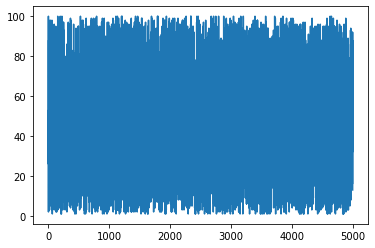

In [50]:
plt.plot(w_best)

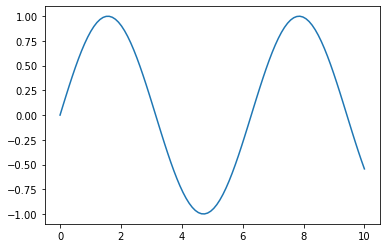

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 100)
y  = np.sin(x)
plt.plot(x, y)

In [66]:
ocu2 = n_occu(w2_best, w_best)

[72 71 71 68 64 58 56 58 62 70 71 73 64 62 56 62 72 66 64 58 50 51 51 61
 70 75 59 56 52 55 61 63 62 53 44 40 47 60 57 57 48 42 41 52 63 65 65 50
 44 43 47 59 60 53 44 38 38 45 64 56 47 34 35 28 32 54 47 46 33 32 28 30
 52 53 46 36 28 30 28 49 54 50 37 30 31 34 48 56 46 36 28 27 32 56 52 46
 32 32 35 31] [62 62 62 62 62 59 57 58 60 63 63 63 58 59 51 60 63 63 63 54 47 48 53 62
 63 63 57 54 51 54 63 63 61 52 42 39 45 60 57 59 50 38 42 52 63 63 63 47
 42 43 50 58 61 54 43 37 42 49 63 61 48 36 36 36 36 49 48 45 36 36 36 36
 54 55 49 36 36 36 36 49 54 51 37 36 36 36 52 57 49 36 35 35 35 58 55 48
 36 35 37 35] 258


KeyboardInterrupt: 

In [ ]:
ocu2

In [ ]:
occupancies

In [258]:
dir(io)

['List',
 'Path',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'load_data',
 'load_sample_submission',
 'pd',
 'save_result']

In [259]:
io.save_result(bb2, score)

FileNotFoundError: [Errno 2] File b'../input/santa-workshop-tour-2019/sample_submission.csv' does not exist: b'../input/santa-workshop-tour-2019/sample_submission.csv'

In [261]:
s = io.load_sample_submission(Path('../../input'))
s["assigned_day"] = bb2
s.to_csv(f"submission_{score}.csv")

In [345]:
initial_best = solve_lap(data, occupancies)
best = initial_best

In [346]:
from santa_workshop_tour_2019.cost import create_penalty_memo

In [347]:
weights = create_penalty_memo(data)

In [348]:
weights.shape

(5000, 101)

In [349]:
occupancies.shape

(101,)

In [352]:
data.n_people.values.shape

(5000,)

In [353]:
125 / occupancies[1:]

array([1.76056338, 1.83823529, 1.71232877, 1.78571429, 1.86567164,
       2.15517241, 2.19298246, 2.08333333, 2.04918033, 1.73611111,
       1.8115942 , 1.68918919, 2.04918033, 2.08333333, 2.19298246,
       2.01612903, 1.66666667, 1.8115942 , 1.86567164, 2.04918033,
       2.5       , 2.45098039, 2.35849057, 1.953125  , 1.8115942 ,
       1.64473684, 2.01612903, 2.11864407, 2.35849057, 2.31481481,
       1.98412698, 1.92307692, 1.92307692, 2.45098039, 2.84090909,
       3.28947368, 2.77777778, 2.08333333, 2.11864407, 2.01612903,
       2.55102041, 2.90697674, 3.04878049, 2.55102041, 1.98412698,
       1.86567164, 1.953125  , 2.65957447, 3.04878049, 3.20512821,
       2.77777778, 2.11864407, 2.11864407, 2.40384615, 3.04878049,
       3.57142857, 3.78787879, 2.7173913 , 1.89393939, 2.15517241,
       2.5       , 3.78787879, 3.47222222, 4.16666667, 4.03225806,
       2.11864407, 2.60416667, 2.7173913 , 4.03225806, 4.16666667,
       4.46428571, 4.16666667, 2.40384615, 2.40384615, 2.90697

In [354]:
300 / occupancies[1:]

array([ 4.22535211,  4.41176471,  4.10958904,  4.28571429,  4.47761194,
        5.17241379,  5.26315789,  5.        ,  4.91803279,  4.16666667,
        4.34782609,  4.05405405,  4.91803279,  5.        ,  5.26315789,
        4.83870968,  4.        ,  4.34782609,  4.47761194,  4.91803279,
        6.        ,  5.88235294,  5.66037736,  4.6875    ,  4.34782609,
        3.94736842,  4.83870968,  5.08474576,  5.66037736,  5.55555556,
        4.76190476,  4.61538462,  4.61538462,  5.88235294,  6.81818182,
        7.89473684,  6.66666667,  5.        ,  5.08474576,  4.83870968,
        6.12244898,  6.97674419,  7.31707317,  6.12244898,  4.76190476,
        4.47761194,  4.6875    ,  6.38297872,  7.31707317,  7.69230769,
        6.66666667,  5.08474576,  5.08474576,  5.76923077,  7.31707317,
        8.57142857,  9.09090909,  6.52173913,  4.54545455,  5.17241379,
        6.        ,  9.09090909,  8.33333333, 10.        ,  9.67741935,
        5.08474576,  6.25      ,  6.52173913,  9.67741935, 10.  

In [403]:
def f(x, l=0.01):
    x = x.reshape(-1, 1)
    o = occupancies[1:].reshape(1, -1)
    return np.clip(l * (x - 125 / o) * (x - 300 / o), 0, None)

In [391]:
[f(x)[19] for x in range(10)]

[0.10077936038699274,
 0.04110722923945175,
 0.001435098091910772,
 0.0,
 0.0,
 0.002418704649287822,
 0.04274657350174684,
 0.10307444235420586,
 0.1834023112066649,
 0.28373018005912387]

In [400]:
(data.n_people.values.reshape(-1, 1) - 125 / (occupancies[1:].reshape(1,-1))).shape

(5000, 100)

In [407]:
f(data.n_people.values)[10]

array([0.14537592, 0.13359862, 0.15283543, 0.14153061, 0.12950769,
       0.0885434 , 0.0834903 , 0.09833333, 0.10307444, 0.14914352,
       0.13760555, 0.15645362, 0.10307444, 0.09833333, 0.0834903 ,
       0.10771592, 0.16      , 0.13760555, 0.12950769, 0.10307444,
       0.045     , 0.05084198, 0.06217871, 0.11670898, 0.13760555,
       0.16347645, 0.10771592, 0.09349038, 0.06217871, 0.0676749 ,
       0.11226002, 0.12106509, 0.12106509, 0.05084198, 0.00756198,
       0.        , 0.01407407, 0.09833333, 0.09349038, 0.10771592,
       0.03904207, 0.00095187, 0.        , 0.03904207, 0.11226002,
       0.12950769, 0.11670898, 0.02678135, 0.        , 0.        ,
       0.01407407, 0.09349038, 0.09349038, 0.05656805, 0.        ,
       0.        , 0.        , 0.02048204, 0.12533058, 0.0885434 ,
       0.045     , 0.        , 0.        , 0.        , 0.        ,
       0.09349038, 0.03296875, 0.02048204, 0.        , 0.        ,
       0.        , 0.        , 0.05656805, 0.05656805, 0.00095

In [408]:
data.n_people.values[10]

7

In [444]:
ww2 = weights[:,1:] + 1000 * f(data.n_people.values)

In [411]:
weights

array([[2236., 2236., 2236., ..., 2236., 2236., 2236.],
       [2236., 2236., 2236., ..., 2236., 2236., 2236.],
       [1802., 1802., 1802., ..., 1802., 1802.,    0.],
       ...,
       [3104., 3104., 3104., ..., 3104., 3104., 3104.],
       [2670.,  390., 2670., ..., 2670., 2670., 2670.],
       [2236., 2236., 2236., ..., 2236., 2236., 2236.]])

In [445]:
ww3 = ww2.repeat(occupancies[1:], axis=1).reshape(5000, 5000)

In [419]:
from lap import lapjv

In [446]:
least_cost, col, row = lapjv(ww3)

In [421]:
from santa_workshop_tour_2019.cost import _calc_days

ImportError: cannot import name '_calc_days'

In [422]:
col

array([3061, 1599, 4995, ..., 2029, 4685,  859], dtype=int32)

In [423]:
def _calc_days(occupancies, col, l):
    acc = np.cumsum(occupancies)
    best = np.zeros(l, dtype=np.int64)
    for i in range(len(col)):
        c = col[i]
        j = 1
        while acc[j] <= c:
            j += 1
        best[i] += j
    return best

In [447]:
ret = _calc_days(occupancies, col, weights.shape[0])

In [448]:
total_cost(ret)

118581.55019454734

In [427]:
nitial_best = solve_lap(data, occupancies)

In [428]:
total_cost(nitial_best)

8400000000.0

In [457]:
import random
random.choice(tuple(set('abc')))

'b'

In [466]:
days = set(range(1,101))
focus_days = []
while 0 < len(days):
    focus = random.choice(tuple(days))
    focus_days.append(focus)
    days.remove(focus)
    if focus - 1 in days:
        days.remove(focus-1)
    if focus + 1 in days:
        days.remove(focus+1)
len(days)

0

In [468]:
len(candidate_days)

42

In [1]:
def combinations(iterable, r):
    # combinations('ABCD', 2) --> AB AC AD BC BD CD
    # combinations(range(4), 3) --> 012 013 023 123
    pool = tuple(iterable)
    n = len(pool)
    if r > n:
        return
    indices = list(range(r))
    yield tuple(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            return
        indices[i] += 1
        for j in range(i+1, r):
            indices[j] = indices[j-1] + 1
        yield tuple(pool[i] for i in indices)

In [7]:
list(combinations([[1,5],[2,9],[3,7]], 2))

[([1, 5], [2, 9]), ([1, 5], [3, 7]), ([2, 9], [3, 7])]

In [18]:
fams = {
    (2,): [(1,), (4,), (6,)],
    (3,): [(2,)],
    (4,): [(3,)],
    (5,): [(5,)]
}

In [19]:
fams

{(2,): [(1,), (4,), (6,)], (3,): [(2,)], (4,): [(3,)], (5,): [(5,)]}

In [20]:
list(combinations(fams[(2,)], 2))

[((1,), (4,)), ((1,), (6,)), ((4,), (6,))]

In [21]:
import random
random.shuffle(fams[(2,)])

In [22]:
fams[(2,)]

[(1,), (6,), (4,)]

In [ ]:
facts = {
    2: [[(2, 1)],
    3: [[(3, 1)],
    4: [[(4, 1)], [(2,2)],
    5: [[(5, 1)], [(2, 1), (3,1)]],
    6: [[(6, 1)], [(2, 1), (4, 1)], [(2, 3)], [(3, 2)]],
    7: [[(7, 1)], [(2, 1), (5, 1)], [(2, 2), (3, 1)], ]
}

In [ ]:
facts = {
    2: [2],
    3: [3],
    4: [2, 4],
    5: [2, 3, 5],
    6: [2, 3, 4, 6],
    7: [2, 3, 4, 5, 7],
    8: [2, 3, 4, 5, 6, 8]
}

In [24]:
load_data()

NameError: name 'load_data' is not defined

In [30]:
from santa_workshop_tour_2019.io import load_data
from pathlib import Path

In [209]:
data = load_data(Path('../../input'))
df = load_data(Path('../../input'))
df.keys()

Index(['choice_0', 'choice_1', 'choice_2', 'choice_3', 'choice_4', 'choice_5',
       'choice_6', 'choice_7', 'choice_8', 'choice_9', 'n_people'],
      dtype='object')

In [51]:
df.family_id

AttributeError: 'DataFrame' object has no attribute 'family_id'

In [85]:
list(df.groupby('n_people').groups[2].values)

[3,
 6,
 13,
 14,
 15,
 19,
 26,
 37,
 43,
 44,
 49,
 51,
 52,
 60,
 80,
 83,
 87,
 89,
 92,
 101,
 104,
 132,
 137,
 145,
 152,
 153,
 155,
 160,
 175,
 178,
 182,
 185,
 187,
 194,
 197,
 199,
 200,
 205,
 206,
 215,
 220,
 225,
 226,
 230,
 242,
 264,
 267,
 273,
 288,
 291,
 301,
 311,
 312,
 325,
 332,
 353,
 363,
 365,
 367,
 371,
 374,
 393,
 397,
 399,
 400,
 406,
 407,
 420,
 424,
 435,
 448,
 450,
 461,
 467,
 470,
 479,
 482,
 499,
 502,
 505,
 508,
 510,
 521,
 522,
 534,
 536,
 539,
 550,
 552,
 553,
 560,
 566,
 575,
 582,
 595,
 598,
 610,
 644,
 645,
 658,
 667,
 669,
 691,
 694,
 707,
 710,
 721,
 726,
 730,
 739,
 743,
 744,
 746,
 747,
 749,
 757,
 763,
 770,
 773,
 775,
 777,
 782,
 783,
 792,
 797,
 809,
 815,
 820,
 833,
 850,
 854,
 858,
 862,
 864,
 881,
 887,
 894,
 900,
 905,
 921,
 931,
 932,
 934,
 963,
 964,
 973,
 983,
 988,
 989,
 997,
 998,
 1004,
 1007,
 1009,
 1026,
 1037,
 1046,
 1059,
 1063,
 1066,
 1079,
 1083,
 1085,
 1098,
 1101,
 1111,
 1121,
 11

In [87]:
family_size = df.n_people.values

In [156]:
def group_by_family_size(occ, family_size):
    group = {}
    for i in (occ):
        size= family_size[i]
        group.setdefault(size, []).append(i)
        
    return group

In [203]:
from collections import deque

def group_by_family_size(occ, family_size):
    group = {}
    for i in (occ):
        size= family_size[i]
        group.setdefault(size, []).append(i)
        
    return group

def _concat_source_ids(id_groups, target_size):
    target_sizes = [*range(2, target_size - 1), target_size]
    concat_ids = sum((id_groups[size] for size in target_sizes), [])
    random.shuffle(concat_ids)
    return concat_ids

def _create_specified_family_size_groups(fam_id_groups, family_size, dst_size):
    fam_ids = _concat_source_ids(fam_id_groups, dst_size)
    
    qs = {i: deque([]) for i in range(2, dst_size + 1)}
    for cur_id in fam_ids:
        cur_size = family_size[cur_id]
        for prev_size in range(dst_size - cur_size, cur_size-1, -cur_size):
            if 0 < len(qs[prev_size]):
                prev_ids = qs[prev_size].popleft()
                new_size = cur_size + prev_size
                new_ids = (cur_id, *prev_ids)
                qs[new_size].append(new_ids)
                break
        else:
            qs[cur_size].append((cur_id,))
            
    return list(qs[dst_size])

import numpy as np
def _create_weights(prediction, fam_id_groups, penalty_memo):
    weights = np.zeros((len(fam_id_groups), len(fam_id_groups)), dtype=np.int64)
    for i in range(len(fam_id_groups)):
        for j in range(len(fam_id_groups)):
            if i == j:
                continue
            id_group_i = fam_id_groups[i]
            day_i = prediction[id_group_i[0]]
            
            id_group_j = fam_id_groups[j]
            day_j = prediction[id_group_j[0]]
            
            weights[i, j] = sum([penalty_memo[id_i, day_i] - penalty_memo[id_i, day_j] for id_i in id_group_i])
    return weights

In [276]:
occ = [random.randint(0, 5000) for _ in range(128)]
best = [random.randint(1, 100) for _ in range(5000)]

fam_id_groups = group_by_family_size(occ, family_size)
id_groups = _create_specified_family_size_groups(fam_id_groups, family_size, 8)

In [278]:
fam_id_groups

{2: [2597,
  2061,
  4230,
  4579,
  4778,
  14,
  4218,
  104,
  3152,
  536,
  3158,
  1281,
  2028,
  137,
  4742,
  4859,
  4959],
 5: [859,
  4158,
  4711,
  4679,
  4390,
  2751,
  3181,
  2372,
  590,
  3682,
  1277,
  1714,
  2110,
  2616,
  3269,
  4486,
  169,
  2806,
  4192,
  2113,
  269,
  3856,
  147,
  4250],
 3: [1631,
  3980,
  994,
  4981,
  1810,
  4294,
  920,
  3587,
  3886,
  761,
  298,
  4635,
  1183,
  1962,
  2200,
  449,
  1588,
  2748,
  3388,
  3041,
  1707,
  1343,
  4355,
  4893,
  4992,
  2025,
  2334],
 4: [3840,
  1248,
  639,
  930,
  969,
  2008,
  4612,
  3242,
  2396,
  4493,
  436,
  2769,
  2911,
  3673,
  3098,
  779,
  4902,
  4542,
  2502,
  1106,
  4432,
  518,
  465,
  2202,
  3698,
  276,
  3400,
  1291,
  1835,
  3090,
  2982,
  4681,
  403,
  4737,
  1096,
  2664,
  1282,
  1887],
 6: [2998, 2443, 1528, 1487, 4876, 2002, 1701, 2543, 2736, 3798, 3945],
 7: [2983, 507, 3339, 1567, 4521, 787, 2514, 2726, 431],
 8: [1176, 1110]}

In [242]:
from santa_workshop_tour_2019.cost import create_penalty_memo

In [243]:
penalty_memo = create_penalty_memo(data)

In [246]:
import numpy as np
def _create_weights(prediction, fam_id_groups, penalty_memo):
    weights = np.zeros((len(fam_id_groups), len(fam_id_groups)), dtype=np.int64)
    for i in range(len(fam_id_groups)):
        for j in range(len(fam_id_groups)):
            if i == j:
                continue
            id_group_i = fam_id_groups[i]
            day_i = prediction[id_group_i[0]]
            
            id_group_j = fam_id_groups[j]
            day_j = prediction[id_group_j[0]]
            
            weights[i, j] = sum([penalty_memo[id_i, day_i] - penalty_memo[id_i, day_j] for id_i in id_group_i])
    return weights

In [266]:
weights = _create_weights(best, id_groups, penalty_memo)

In [267]:
from lap import lapjv
_, col, _ = lapjv(weights)

In [268]:
col

array([45, 41, 48,  3,  6, 42, 40, 43, 47, 33, 34, 46, 39, 37, 36, 28, 30,
       22, 32, 31, 29, 27, 25, 23, 26, 24, 20, 19, 16, 14, 18, 17, 15, 12,
       13, 44, 11,  8,  5, 10,  4,  2,  9,  1, 50, 21, 49, 35, 38,  7,  0],
      dtype=int32)

In [269]:
new = best.copy()
for i in range(len(col)):
    new_day = best[id_groups[col[i]][0]]
    for j in id_groups[i]:
        new[j] = new_day

In [270]:
from santa_workshop_tour_2019.cost import build_cost_function
total_cost, delta_move_cost, delta_swap_cost = build_cost_function(data)

In [275]:
total_cost(new)[0] - total_cost(best)[0]

-98937.96177694201

In [274]:
total_cost(new)[0]

11026888.181573827